Kings County Housing Prices

# Pre-EDA and Data Cleaning

## Importing important libraries

In [1]:
# Import important libraries
import pyforest
import folium
%matplotlib inline
from pandas.plotting import scatter_matrix
from lazypredict.Supervised import LazyRegressor

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from statsmodels.formula.api import ols

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Settings
pd.set_option('display.max_columns', None)





# import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

# import seaborn as sns
# import folium
# import warnings

# from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
# from sklearn.model_selection import train_test_split
# from sklearn import linear_model
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score
# 
# from sklearn.preprocessing import StandardScaler
# from statsmodels.formula.api import ols
# from folium.plugins import HeatMap
# from mpl_toolkits.mplot3d import Axes3D
# from haversine import haversine
# from IPython.display import Image

# # shows all the dataframe's columns
# pd.set_option('display.max_columns', 999)

# converts exponencial numbers to float numbers
# pd.options.display.float_format = '{:,.0f}'.format 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

## Read the Data

The first step is read the data from a csv file to a Pandas DataFrame.

In [2]:
test = pd.read_csv('../data/kc_house_data_test_features.csv', index_col=0)
df = pd.read_csv('../data/kc_house_data_train.csv', index_col=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA Round 1

In [3]:
# Check the shape of the dataframe
print(df.shape)
# Check the first 5 rows of the train dataframe
df.head()

(17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.00,4,2.25,2070,8893,2.00,0,0,4,8,2070,0,1986,0,98058,47.44,-122.16,2390,7700
1,7974200820,20140821T000000,865000.00,5,3.00,2900,6730,1.00,0,0,5,8,1830,1070,1977,0,98115,47.68,-122.28,2370,6283
2,7701450110,20140815T000000,1038000.00,4,2.50,3770,10893,2.00,0,2,3,11,3770,0,1997,0,98006,47.56,-122.13,3710,9685
3,9522300010,20150331T000000,1490000.00,3,3.50,4560,14608,2.00,0,2,3,12,4560,0,1990,0,98034,47.70,-122.23,4050,14226
4,9510861140,20140714T000000,711000.00,3,2.50,2550,5376,2.00,0,0,3,9,2550,0,2004,0,98052,47.66,-122.08,2250,4050


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Get information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00
mean,4565501756.44,540739.55,3.37,2.11,2081.46,15243.40,1.49,0.01,0.24,3.41,7.65,1789.31,292.16,1970.79,83.81,98078.19,47.56,-122.21,1987.99,12873.48
std,2874655595.36,373318.98,0.94,0.77,920.02,42304.62,0.54,0.09,0.78,0.65,1.17,829.27,443.15,29.34,400.33,53.61,0.14,0.14,684.80,27227.44
min,1000102.00,75000.00,0.00,0.00,290.00,572.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,2114700558.75,321000.00,3.00,1.50,1430.00,5081.25,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5111.25
50%,3903650042.50,450000.00,3.00,2.25,1920.00,7642.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1974.00,0.00,98065.00,47.57,-122.23,1840.00,7622.50
75%,7301150051.50,645000.00,4.00,2.50,2550.00,10725.75,2.00,0.00,0.00,4.00,8.00,2214.50,560.00,1996.00,0.00,98118.00,47.68,-122.13,2360.00,10101.75
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,858132.00


In [7]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

### Findings:
- The train data set contains 17290 rowns and 22 columns
- There aren't any null values
- Fix the date columns to time series
- Is the date column showing when the house was sold?
- Create columns with years since last renovation
- There is a house with 33 bedrooms. Could be an outlier

## Data Cleaning

### Converting column date to datetime type

In [8]:
# Fix the date column
df['date'] = pd.to_datetime(df['date'])
df.head(2)

<IPython.core.display.Javascript object>

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.00,4,2.25,2070,8893,2.00,0,0,4,8,2070,0,1986,0,98058,47.44,-122.16,2390,7700
1,7974200820,2014-08-21,865000.00,5,3.00,2900,6730,1.00,0,0,5,8,1830,1070,1977,0,98115,47.68,-122.28,2370,6283


In [9]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# EDA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

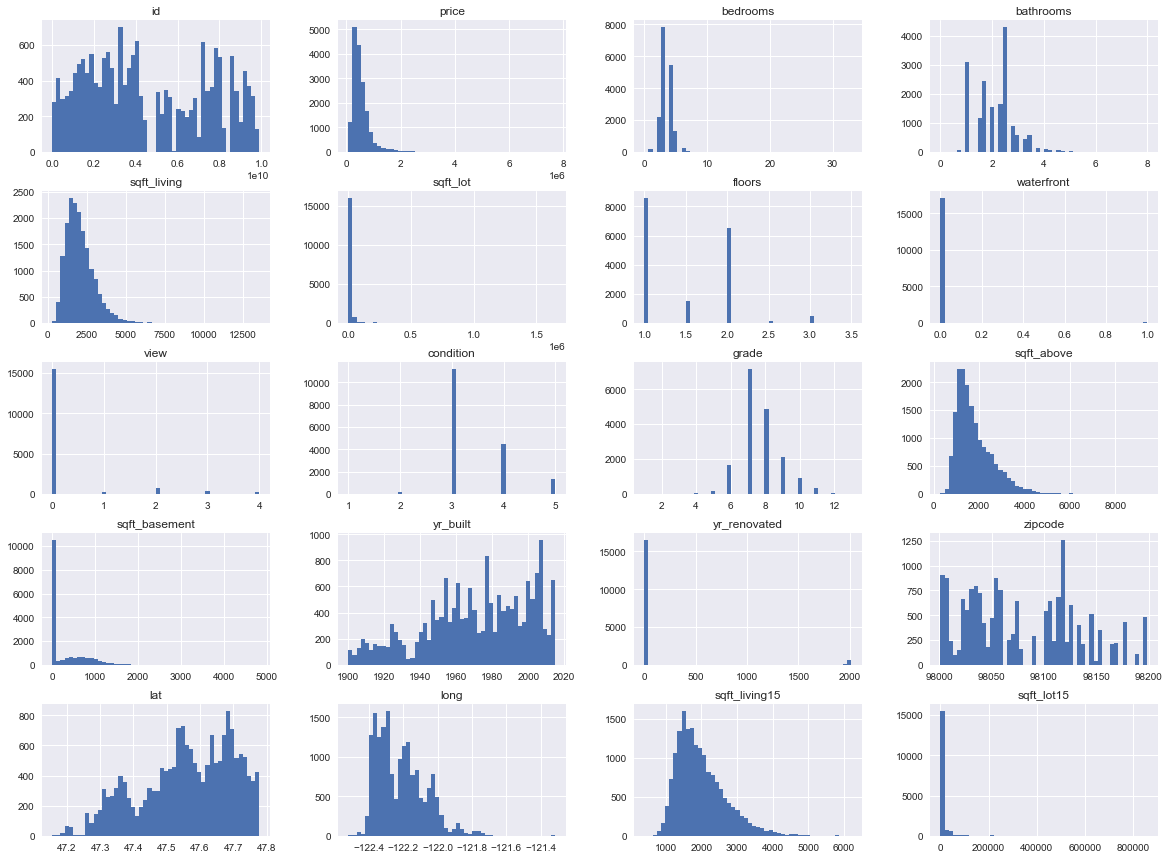

In [10]:
plt.style.use('seaborn')

df.hist(bins=50, figsize=(20,15))
plt.show()

## Visualizing Geographical Data Density

<IPython.core.display.Javascript object>

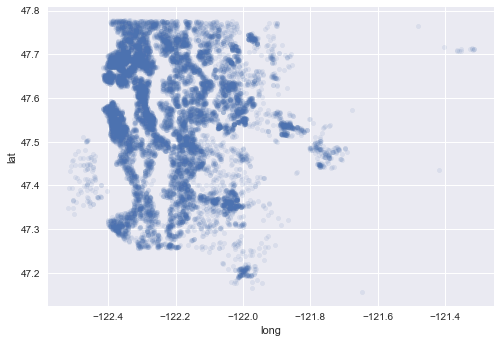

In [11]:
df.plot(kind='scatter', x='long', y='lat', alpha=0.1)
plt.show()

## Looking for Correlations

In [12]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.52
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.30
waterfront       0.28
floors           0.26
yr_renovated     0.12
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.06
condition        0.04
long             0.02
id              -0.02
zipcode         -0.05
Name: price, dtype: float64

<IPython.core.display.Javascript object>

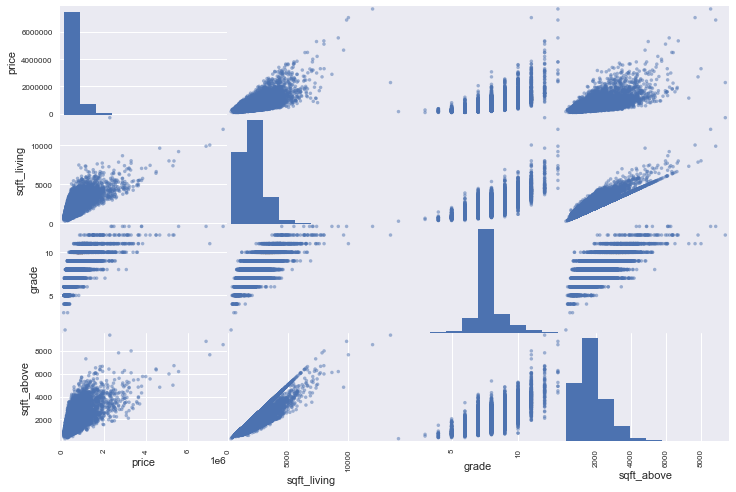

In [13]:
attributes_1 = ['price','sqft_living','grade','sqft_above']  
scatter_matrix(df[attributes_1], figsize=(12,8))
plt.show()

<IPython.core.display.Javascript object>

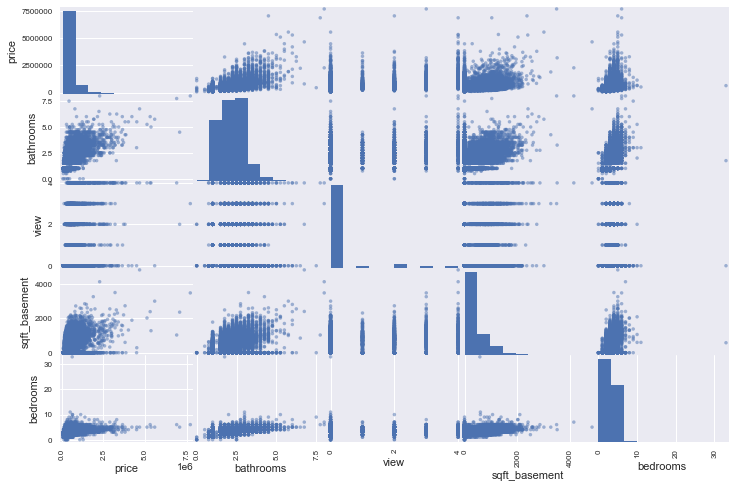

In [14]:
attributes_2 = ['price','bathrooms', 'view', 'sqft_basement', 'bedrooms'] 
scatter_matrix(df[attributes_2], figsize=(12,8))
plt.show()

### Fix any extremes problems with the data

In [15]:
# Using nlargest to see the rows with the highest number of bedrooms
df.nlargest(5,'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8597,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700
2356,1773100755,2014-08-21,520000.00,11,3.00,3000,4960,2.00,0,0,3,7,2400,600,1918,1999,98106,47.56,-122.36,1420,4960
3680,8812401450,2014-12-29,660000.00,10,3.00,2920,3745,2.00,0,0,4,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745
11181,627300145,2014-08-14,1148000.00,10,5.25,4590,10920,1.00,0,2,3,9,2500,2090,2008,0,98004,47.59,-122.11,2730,10400
17114,5566100170,2014-10-29,650000.00,10,2.00,3610,11914,2.00,0,0,4,7,3010,600,1958,0,98006,47.57,-122.17,2040,11914


Ok, it is an outlier. Based on the price, it sounds a weird that this house contains 33 bedrooms. Luckily, there is an ID that we can use on internet and see if we can find this house.
I was able to find the house with 33 bedrooms on Zillow and Clustmaps. All the information about the house matches, except the number of bedrooms, which seems a typo. The house has 3 bedrooms. Thus, I'll fix it.

In [16]:
# This fixes the house with 33 bedrooms turning it into a 3-bedroom house
df[df['bedrooms'] == 33] = df[df['bedrooms'] == 3]

# This will add 1 bathroom to houses without any bathroom
df['bathrooms'] = df.bedrooms.apply(lambda x: 1 if x < 1 else x)

- The outlier in the bedroom collumn was a typo and it was fixed.
- One bathroom was included to all the houses without bathroom in the data set.
- One bedroom was included to all the houses without a bedroom in the data set.

# Feature Engineering

In [17]:
# # Create year and month features
# df['year_sold'] = pd.to_datetime(df['date']).dt.to_period('Y')
# df['mont_sold'] = pd.to_datetime(df['date']).dt.to_period('M')
# df.head()

In [18]:
df['sqft_foot_per_bedroom'] = df['sqft_living']/df['bedrooms']
df['price_per_sqft'] = df['price']/df['sqft_living']

In [19]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price                    1.00
sqft_living              0.70
grade                    0.67
sqft_above               0.61
sqft_living15            0.59
sqft_foot_per_bedroom    0.58
price_per_sqft           0.56
view                     0.40
sqft_basement            0.32
bathrooms                0.31
bedrooms                 0.31
lat                      0.30
waterfront               0.28
floors                   0.26
yr_renovated             0.12
sqft_lot                 0.09
sqft_lot15               0.08
yr_built                 0.06
condition                0.04
long                     0.02
id                      -0.02
zipcode                 -0.05
Name: price, dtype: float64

# Ordinary Least Squares

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
sqft_foot_per_bedroom    0
price_per_sqft           0
dtype: int64

In [39]:
all_mod = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15+sqft_foot_per_bedroom', data=df).fit()
all_mod.summary()

# +lat+long++price_per_sqft

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2407.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:05:44   Log-Likelihood:            -2.3683e+05
No. Observations:               17277   AIC:                         4.737e+05
Df Residuals:                   17262   BIC:                         4.738e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.905e+06   1.46e+05     40.544      0.000    5.62e+06    6.19e+06
bedrooms              -6.618e+04   2456.500    -26.940      0.000    -7.1e+04   -6.14e+04
bathrooms             -6.618e+04   2456.500    -26.940      0.000    -7.1e+04   -6.14e+04
sqft_living             228.8337      5.245     43.633      0.000     218.554     239.113
sqft_lot                  0.0123      0.055      0.223      0.824      -0.096       0.120
floors                 4.364e+04   4120.124     10.592      0.000    3.56e+04    5.17e+04
waterfront             6.103e+05   2.05e+04     29.797      0.000     5.7e+05     6.5e+05
view                   4.311e+04   2531.782     17.028      0.000    3.81e+04    4.81e+04
condition              2.357e+04   2793.963      8.435      0.000    1.81e+04     2.9e+04
grade                  1.231e+05   2538.326     48.515      0.000    1.18e+05    1.28e+05
sqft_above              101.8886      3.370     30.235      0.000      95.283     108.494
sqft_basement           126.9451      3.913     32.439      0.000     119.275     134.616
yr_built              -3259.9356     74.487    -43.765      0.000   -3405.937   -3113.934
yr_renovated             16.8931      4.371      3.865      0.000       8.325      25.461
sqft_living15            26.2354      4.057      6.467      0.000      18.283      34.188
sqft_lot15               -0.4999      0.086     -5.781      0.000      -0.669      -0.330
sqft_foot_per_bedroom  -549.4223     25.234    -21.773      0.000    -598.884    -499.961
==============================================================================
Omnibus:                    12194.410   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           722200.005
Skew:                           2.779   Prob(JB):                         0.00
Kurtosis:                      34.182   Cond. No.                     2.91e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.33e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Train Test Split

In [23]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Perform a train-test split of the data

In [24]:
# Creating train test split
X = df.drop(columns=['id','price','date'])
y = df.price

In [25]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

<IPython.core.display.Javascript object>

Training set - Features:  (12957, 20) Target:  (12957,)
Test set - Features:  (4320, 20) Target:  (4320,)


# Modeling

In [26]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_train, y_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [27]:
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for ' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

## Lazy Predict

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

# Logistic Regression

## Iteration 1

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [29]:
rmse(lr, y_test, y_pred_lr, X_train, y_train)

<IPython.core.display.Javascript object>

R-squared: 0.8854119865503589
Mean Squared Error: 125170.69300176727


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

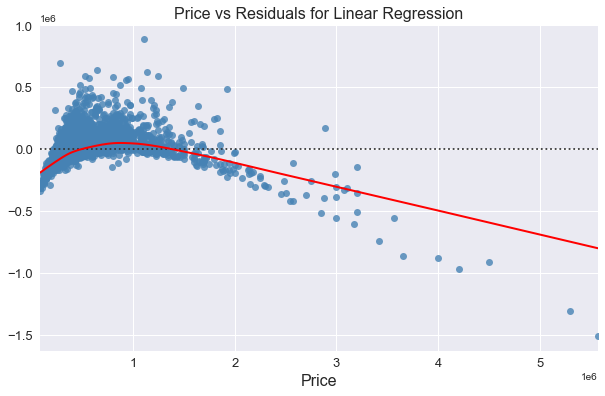

In [30]:
scatter_plot(y_test, y_pred_lr, 'Linear Regression')

## DecisionTree Regression

### Iteration 1

In [31]:
tree = DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [32]:
rmse(tree, y_test, y_pred_tree, X_train, y_train)

<IPython.core.display.Javascript object>

R-squared: 1.0
Mean Squared Error: 61931.147226696965


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

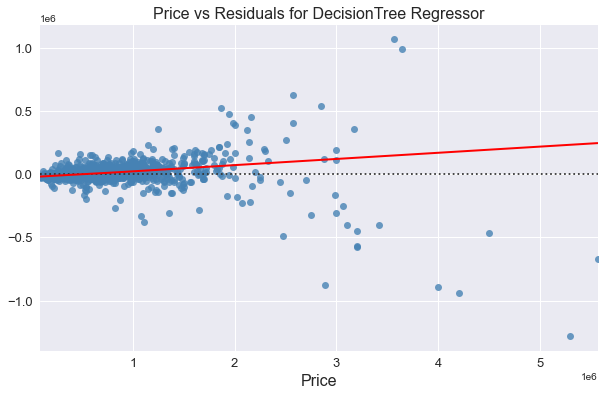

In [34]:
scatter_plot(y_test, y_pred_tree, 'DecisionTree Regressor')

## ExtraTrees Regressor

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [35]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

In [36]:
rmse(tree, y_test, y_pred_reg, X_train, y_train)

<IPython.core.display.Javascript object>

R-squared: 1.0
Mean Squared Error: 24330.466600662876


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

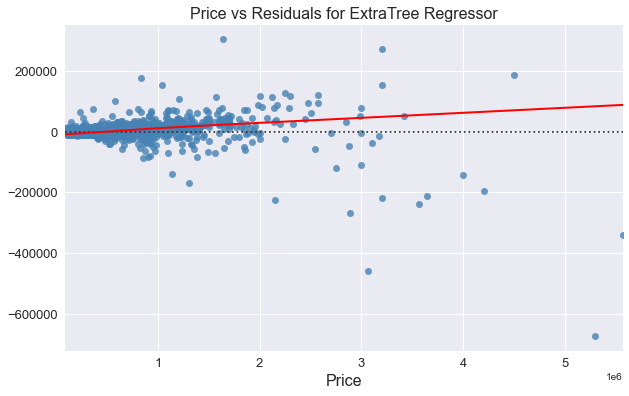

In [38]:
scatter_plot(y_test, y_pred_reg, 'ExtraTree Regressor')